## 1. Obtaining object mask using GrabCut algorithm

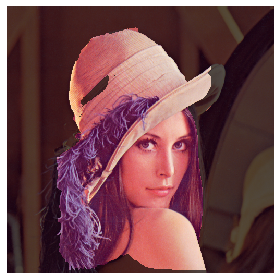

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/Lena.png', cv2.IMREAD_COLOR)
show_img = np.copy(img)

mouse_pressed = False
y = x = w = h = 0

# Step1: Define a function that draws a rectangle in an image.
def mouse_callback(event, _x, _y, flags, param):
    global show_img, x, y, w, h, mouse_pressed

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        x, y = _x, _y
        show_img = np.copy(img)

    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            show_img = np.copy(img)
            cv2.rectangle(show_img, (x, y),
                          (_x, _y), (0, 255, 0), 3)

    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        w, h = _x - x, _y - y

# Step2: After displaying the image, when square is complete, you can press A(key) to close the window.
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

while True:
    cv2.imshow('image', show_img)
    k = cv2.waitKey(1)

    if k == ord('a') and not mouse_pressed:
        if w*h > 0:
            break
    elif k == 27: #ESC
        break

cv2.destroyAllWindows()

# Step3: Call cv2.grapbCut function to create an object mask based on a drawn rectangle.
labels = np.zeros(img.shape[:2],np.uint8)

labels, bgdModel, fgdModel = cv2.grabCut(img, labels, (x, y, w, h), None, None, 5, cv2.GC_INIT_WITH_RECT)

show_img = np.copy(img)
show_img[(labels == cv2.GC_PR_BGD)|(labels == cv2.GC_BGD)] //= 3

cv2.imshow('image', show_img)
cv2.waitKey()
cv2.destroyAllWindows()

# Step4: Define a function to draw a mask on image.
#        This function is to correct the error in cv2.grabCut called earlier.
label = cv2.GC_BGD
lbl_clrs = {cv2.GC_BGD: (0,0,0), cv2.GC_FGD: (255,255,255)}

def mouse_callback(event, x, y, flags, param):
    global mouse_pressed

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        cv2.circle(labels, (x, y), 5, label, cv2.FILLED)
        cv2.circle(show_img, (x, y), 5, lbl_clrs[label], cv2.FILLED)

    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            cv2.circle(labels, (x, y), 5, label, cv2.FILLED)
            cv2.circle(show_img, (x, y), 5, lbl_clrs[label], cv2.FILLED)

    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False

# Step5: Mark the mask with the image.
#        Pixels that are object but recognized as background are modified using white,
#        whereas pixels that are background but recognized as object are modified using black.
#        When the modification is complete, call cv2.grabCut again to modify the mask.
#        Displays the last updated mask.
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

while True:
    cv2.imshow('image', show_img)
    k = cv2.waitKey(1)

    if k == ord('a') and not mouse_pressed:
        break
    elif k == ord('l'):
        label = cv2.GC_FGD - label
    elif k == 27: #ESC
        break

cv2.destroyAllWindows()

labels, bgdModel, fgdModel = cv2.grabCut(img, labels, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

show_img = np.copy(img)
show_img[(labels == cv2.GC_PR_BGD)|(labels == cv2.GC_BGD)] //= 3

#cv2.imshow('image', show_img)
#cv2.waitKey()
#cv2.destroyAllWindows()

image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

## 2. Finding edges using Canny algorithm

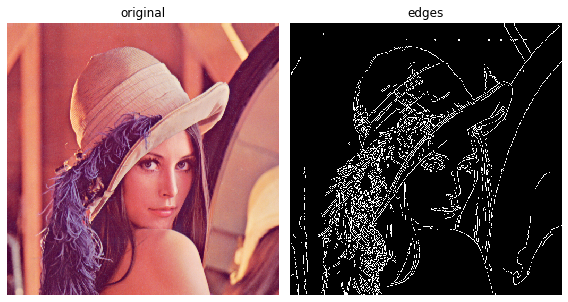

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./data/Lena.png')
# Canny algo: The first threshold is used to detect strong edges, and
#             the second threshold is used in the history of strong edges being connected.
edges = cv2.Canny(image, 200, 100)

plt.figure(figsize=(8,5))
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.title('original')
plt.imshow(image[:,:,[2,1,0]])
plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.title('edges')
plt.imshow(edges, cmap='gray')
plt.tight_layout()
plt.show()

## 3. Detecting lines and circles using Hough transform

Detected line: (99 401) (372 353)
Detected circle: center=(200.5 200.5), radius=52.29999923706055


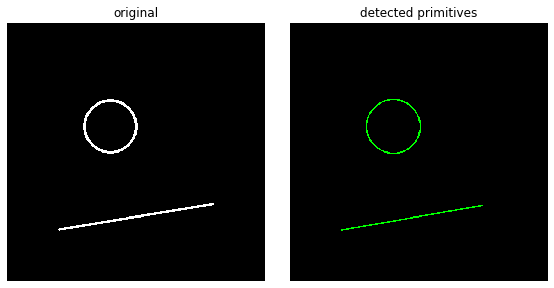

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = np.zeros((500, 500), np.uint8)

cv2.circle(img, (200, 200), 50, 255, 3)
cv2.line(img, (100, 400), (400, 350), 255, 3)

# Hough transformation is a detection technique
# for shapes that are parametricized and expressed in a simple mathematical form.
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 15, param1=200, param2=30)[0]
lines = cv2.HoughLinesP(img, 1, np.pi/180, 100, 100, 10)[0]

dbg_img = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)    
for x1, y1, x2, y2 in lines:
    print('Detected line: ({} {}) ({} {})'.format(x1, y1, x2, y2))
    cv2.line(dbg_img, (x1, y1), (x2, y2), (0, 255, 0), 2)    

for c in circles:
    print('Detected circle: center=({} {}), radius={}'.format(c[0], c[1], c[2]))
    cv2.circle(dbg_img, (c[0], c[1]), c[2], (0, 255, 0), 2)
    
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.title('detected primitives')
plt.axis('off')
plt.imshow(dbg_img)
plt.tight_layout()
plt.show()

## 4. Finding objects via template matching 

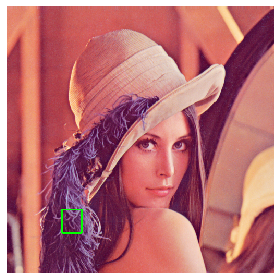

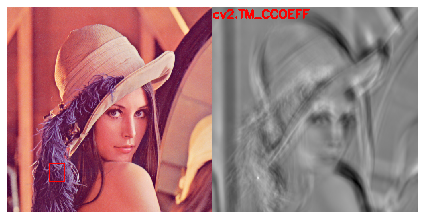

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/Lena.png', cv2.IMREAD_COLOR)
show_img = np.copy(img)

# Step1: Define a function for selecting the ROI.
#        The rectangle drawn here is used as a template for matching.
mouse_pressed = False
y = x = w = h = 0

def mouse_callback(event, _x, _y, flags, param):
    global show_img, x, y, w, h, mouse_pressed

    if event == cv2.EVENT_LBUTTONDOWN:
        mouse_pressed = True
        x, y = _x, _y
        show_img = np.copy(img)

    elif event == cv2.EVENT_MOUSEMOVE:
        if mouse_pressed:
            show_img = np.copy(img)
            cv2.rectangle(show_img, (x, y),
                          (_x, _y), (0, 255, 0), 2)

    elif event == cv2.EVENT_LBUTTONUP:
        mouse_pressed = False
        w, h = _x - x, _y - y
        
# Step2: Display the image and select the object with mouse.
#        Then, press the A key to get the template.
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

while True:
    cv2.imshow('image', show_img)
    k = cv2.waitKey(1)

    if k == ord('a') and not mouse_pressed:
        if w*h > 0:
            break
    elif k == 27: #ESC
        break

cv2.destroyAllWindows()

image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

template = np.copy(img[y:y+h, x:x+w])

# Step3: Display images and handle keyboard events.
#        Numeric keys from 0 to 5 determine methods how they are used to find image areas similar to templates.
#        Matching is performed by cv2.matchTemplate, and when matching is completed,
#        it finds points with the highest similarity metric and draws the detection results on the screen.
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

show_img = np.copy(img)

while True:
    cv2.imshow('image', show_img)
    k = cv2.waitKey()

    if k == 27: #ESC
        break
    elif k > 0 and chr(k).isdigit(): # 0,1,2,3,4,5
        index = int(chr(k))
        if 0 <= index < len(methods):
            method = methods[index]
            
            res = cv2.matchTemplate(img, template, eval(method))
            
            res = cv2.normalize(res, None, 0, 1, cv2.NORM_MINMAX)
            
            if index >= methods.index('cv2.TM_SQDIFF'):
                loc = np.where(res < 0.01)
            else:
                loc = np.where(res > 0.99)
            
            show_img = np.copy(img)
            for pt in zip(*loc[::-1]):
                cv2.rectangle(show_img, pt, (pt[0] + w, pt[1] + h), 
                              (0, 0, 255), 2)
            
            res = cv2.resize(res, show_img.shape[:2])*255
            res = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR).astype(np.uint8)
            cv2.putText(res, method, (0, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, (0, 0, 255), 3)
            
            show_img = np.hstack((show_img, res))

cv2.destroyAllWindows()

image = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

## 5. Real-time median-flow object tracker

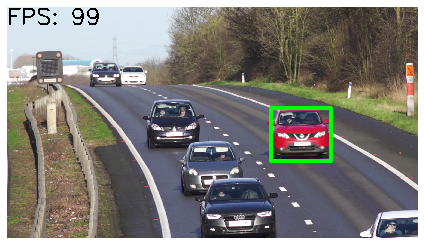

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Step1: Open the video and read the frame, and then select the object to track.
cap = cv2.VideoCapture("./data/traffic.mp4")

_, frame = cap.read()

bbox = cv2.selectROI(frame, False, True) # press space bar 

cv2.destroyAllWindows()

# Step2: Create a median-flow object tracker and
#        initialize tracker generated by the first frame of video and the selected bounding box.
#        Then, read the remaining video one frame into tracker and
#        get a new bounding box from each frame.
#        Finally, it shows the number of frames processed per second
#        by bounding box and median-flow algorithm.
tracker = cv2.TrackerMedianFlow_create()
status_tracker = tracker.init(frame, bbox)
fps = 0

while True:
    status_cap, frame = cap.read()
    if not status_cap:
        break

    if status_tracker:
        timer = cv2.getTickCount()
        status_tracker, bbox = tracker.update(frame)
        
    if status_tracker:
        x, y, w, h = [int(i) for i in bbox]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 15)
        fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);
        cv2.putText(frame, "FPS: %.0f" % fps, (0, 80), cv2.FONT_HERSHEY_SIMPLEX, 3.5, (0, 0, 0), 8);
    else:
        cv2.putText(frame, "Tracking failure detected", (0, 80), cv2.FONT_HERSHEY_SIMPLEX, 3.5, (0,0,255), 8)
        
    cv2.imshow("MedianFlow tracker", frame)

    k = cv2.waitKey(1)
    
    if k == 27: #ESC
        break
    
cv2.destroyAllWindows()

image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()

## 6. Tracking objects using different algorithms via tracking API

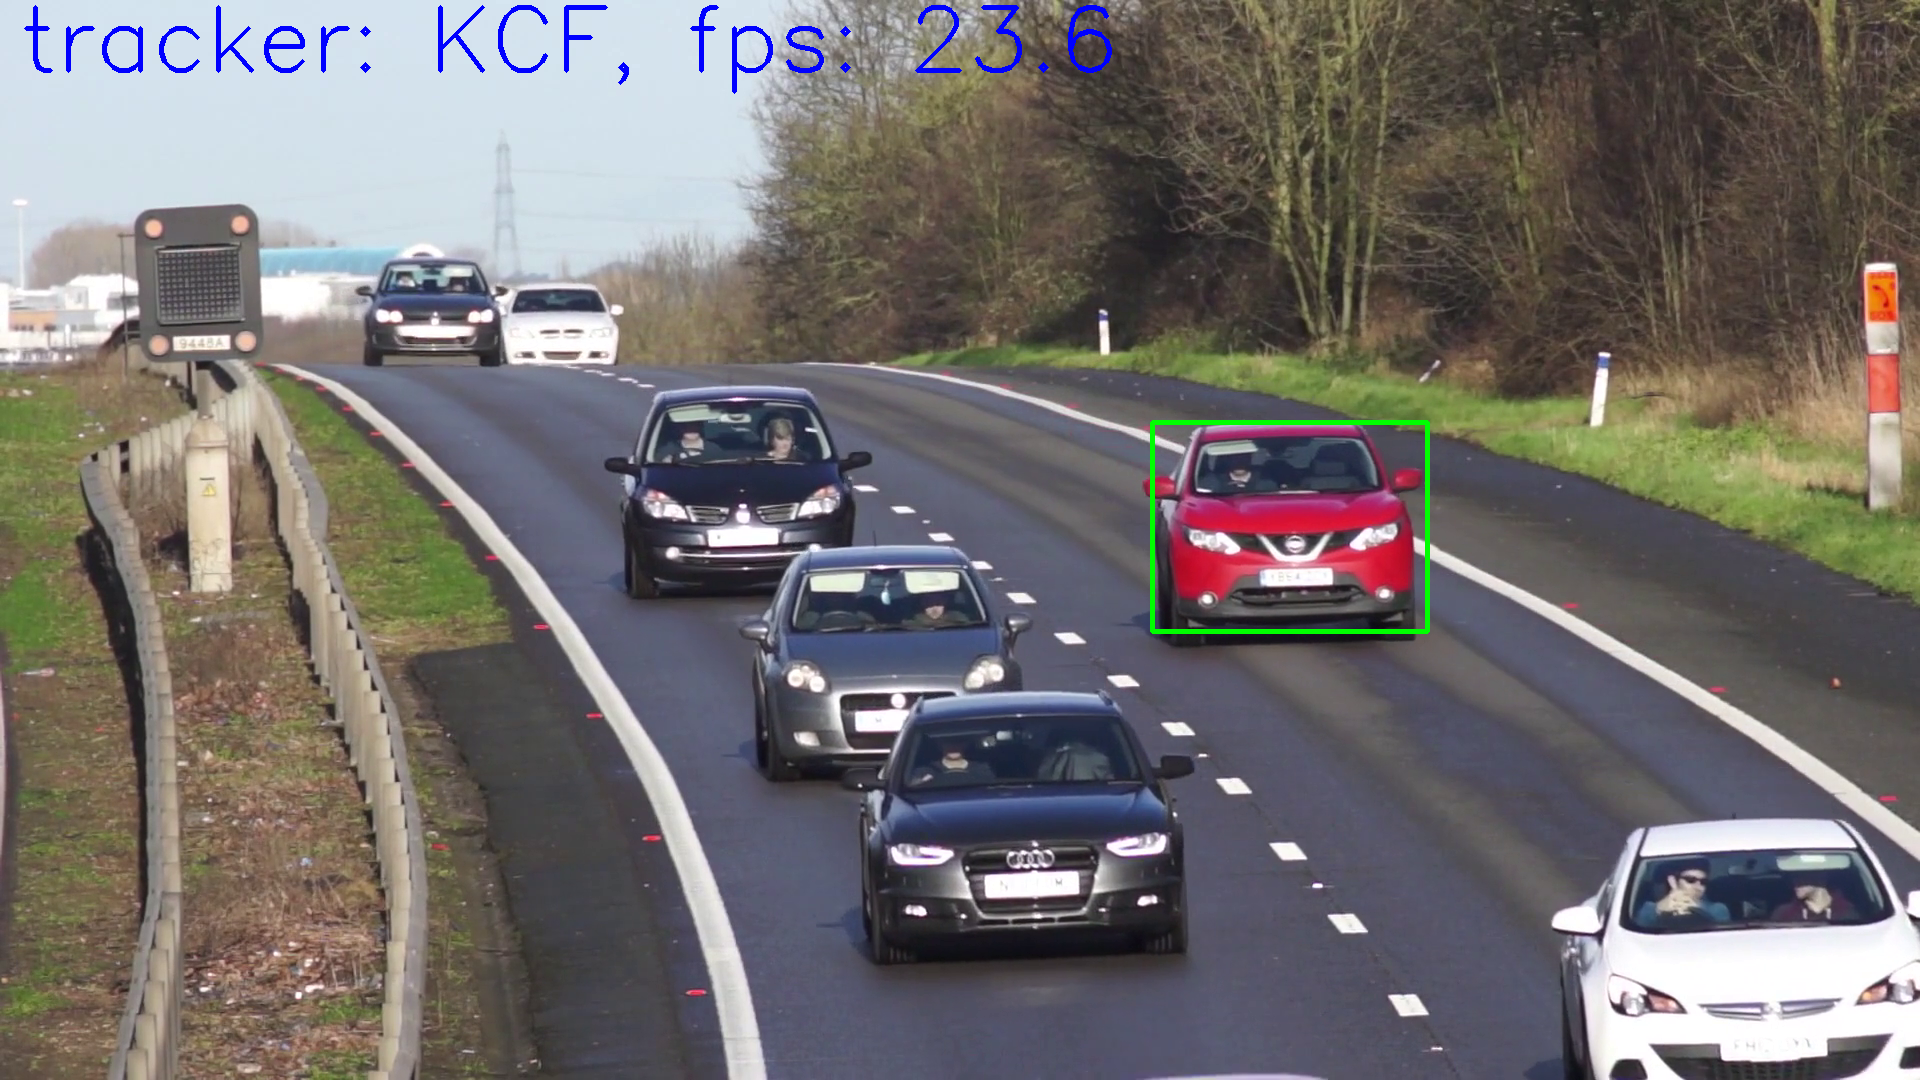

In [6]:
import cv2
import time
import numpy as np
from IPython.display import Image

cv2.namedWindow('frame')

for name, tracker in (('KCF', cv2.TrackerKCF_create), # Kernelized Correlation Filter
                      ('MIL', cv2.TrackerMIL_create), # 
                      ('TLD', cv2.TrackerTLD_create)):# Tracking-Learning-Detection
    tracker = tracker()
    initialized = False

    video = cv2.VideoCapture('./data/traffic.mp4')
    bbox = (878, 266, 1153-878, 475-266)

    i = 0
    while True:
        i += 1
        t0 = time.time()
        ok, frame = video.read()
        if not ok: 
            break

        if initialized:
            tracked, bbox = tracker.update(frame)
        else:
            cv2.imwrite('./data/frame.png', frame)
            tracked = tracker.init(frame, bbox)
            initialized = True

        fps = 1 / (time.time() - t0)
        cv2.putText(frame, 'tracker: {}, fps: {:.1f}'.format(name, fps),
                    (20, 70), cv2.FONT_HERSHEY_SIMPLEX,  3, (255, 0, 0), 4)            
        if tracked:
            bbox = tuple(map(int, bbox))
            cv2.rectangle(frame, (bbox[0], bbox[1]), 
                          (bbox[0]+bbox[2], bbox[1]+bbox[3]), 
                          (0, 255, 0), 3)
        cv2.imshow('frame', frame)
        
        if i == 50:
            cv2.imwrite('./data/frame{}.png'.format(name), frame)
                        
        if cv2.waitKey(3) == 27: #ESC
            break

cv2.destroyAllWindows()
Image(filename='./data/frameKCF.png', width=400)

## 7. Computing dense optical flow between two frames

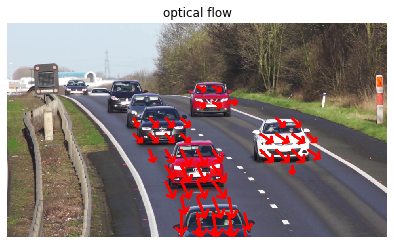

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Step1: Define a function for displaying optical flow.
def display_flow(img, flow, stride=40):    
    for index in np.ndindex(flow[::stride, ::stride].shape[:2]):
        pt1 = tuple(i*stride for i in index)
        delta = flow[pt1].astype(np.int32)[::-1]
        pt2 = tuple(pt1 + 10*delta)
        if 2 <= cv2.norm(delta) <= 10:
            cv2.arrowedLine(img, pt1[::-1], pt2[::-1], (0,0,255), 5, cv2.LINE_AA, 0, 0.4)
        
    norm_opt_flow = np.linalg.norm(flow, axis=2)
    norm_opt_flow = cv2.normalize(norm_opt_flow, None, 0, 1, cv2.NORM_MINMAX)
    
    cv2.imshow('optical flow', img)
    cv2.imshow('optical flow magnitude', norm_opt_flow)
    k = cv2.waitKey(1)
    
    if k == 27: #ESC
        return 1
    else:
        return 0
    
# Step2: Open the video and get the first frame.
#        Then, frame is read one by one and the result is displayed by
#        calculating dense optical flow using Gunnar Farneback algorithm.
cap = cv2.VideoCapture("./data/traffic.mp4")
_, prev_frame = cap.read()

prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
prev_frame = cv2.resize(prev_frame, (0,0), None, 0.5, 0.5)
init_flow = True

while True:
    status_cap, frame = cap.read()
    frame = cv2.resize(frame, (0,0), None, 0.5, 0.5)
    if not status_cap:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if init_flow:
        opt_flow = cv2.calcOpticalFlowFarneback(prev_frame, gray, None, 
                                                0.5, 5, 13, 10, 5, 1.1, 
                                                cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
        init_flow = False
    else:
        opt_flow = cv2.calcOpticalFlowFarneback(prev_frame, gray, opt_flow, 
                                                0.5, 5, 13, 10, 5, 1.1, 
                                                cv2.OPTFLOW_USE_INITIAL_FLOW)
    
    prev_frame = np.copy(gray)
    
    if display_flow(frame, opt_flow):
        break
    
cv2.destroyAllWindows()

# Step3: Set position at the first and read the first frame.
#        Create an instance of the class that calculates dual TV L1 optical flow.
#        Optical flow of sequence is then calculated by reading the frames one by one and
#        display the results.
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
_, prev_frame = cap.read()

prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
prev_frame = cv2.resize(prev_frame, (0,0), None, 0.5, 0.5)

flow_DualTVL1 = cv2.createOptFlow_DualTVL1()

while True:
    status_cap, frame = cap.read()
    frame = cv2.resize(frame, (0,0), None, 0.5, 0.5)
    if not status_cap:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if not flow_DualTVL1.getUseInitialFlow():
        opt_flow = flow_DualTVL1.calc(prev_frame, gray, None)
        flow_DualTVL1.setUseInitialFlow(True)
    else:
        opt_flow = flow_DualTVL1.calc(prev_frame, gray, opt_flow)
            
    prev_frame = np.copy(gray)
    
    if display_flow(frame, opt_flow):
        break

cv2.destroyAllWindows()

image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(11,11))
plt.subplot(121)
plt.axis('off')
plt.title('optical flow')
plt.xticks([]), plt.yticks([])
plt.imshow(image)
plt.tight_layout()
plt.show()

## 8. Detecting chessboard and circles grid patterns

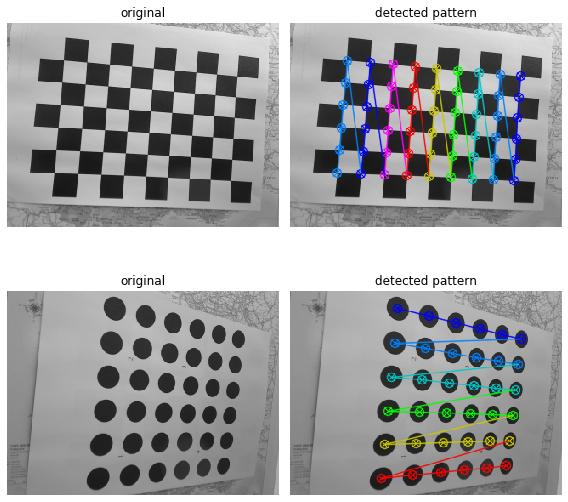

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image_chess = cv2.imread('./data/chessboard.png')

found, corners = cv2.findChessboardCorners(image_chess, (6, 9))
assert found == True, "can't find chessboard pattern"

dbg_image_chess = image_chess.copy()
cv2.drawChessboardCorners(dbg_image_chess, (6, 9), corners, found)

image_circles = cv2.imread('./data/circlesgrid.png')

found, corners = cv2.findCirclesGrid(image_circles, (6, 6), cv2.CALIB_CB_SYMMETRIC_GRID)
assert found == True, "can't find circles grid pattern"

dbg_image_circles = image_circles.copy()
cv2.drawChessboardCorners(dbg_image_circles, (6, 6), corners, found)

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.title('original')
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(image_chess)
plt.subplot(222)
plt.title('detected pattern')
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(dbg_image_chess)
#plt.show()
plt.subplot(223)
plt.title('original')
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(image_circles)
plt.subplot(224)
plt.title('detected pattern')
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(dbg_image_circles)
plt.tight_layout()
plt.show()

## 9. Simple pedestrian detector using SVM model

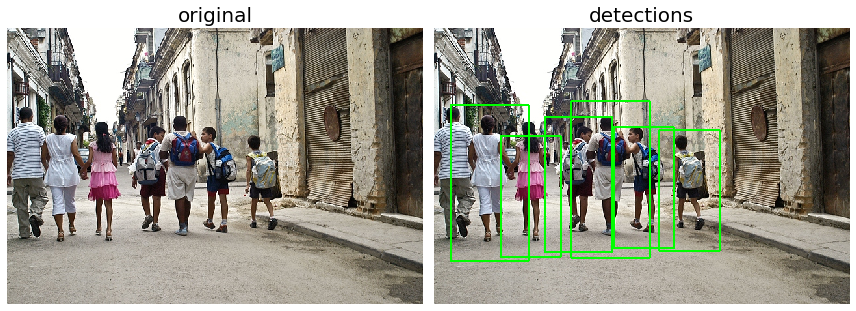

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./data/people.jpg')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor.getDefaultPeopleDetector())

locations, weights = hog.detectMultiScale(image)

# Mark the bounding box with detected people.
dbg_image = image.copy()
for loc in locations:
    cv2.rectangle(dbg_image, (loc[0], loc[1]), 
                  (loc[0]+loc[2], loc[1]+loc[3]), (0, 255, 0), 2)
    
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('original', size=20)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(image[:,:,[2,1,0]])
plt.subplot(122)
plt.title('detections', size=20)
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.imshow(dbg_image[:,:,[2,1,0]])
plt.tight_layout()
plt.show()

## 10. Optical character recognition using different machine learning model

In [10]:
import cv2
import numpy as np

# Step1: Initialize
CELL_SIZE = 20     # numeric image size
NCLASSES = 10      # total number of numbers (0-9; total 10)
TRAIN_RATIO = 0.8  # percentage of samples to be used for training

# Step2: Read prepared labels and numeric images.
digits_img = cv2.imread('./data/digits.png', 0)
digits = [np.hsplit(r, digits_img.shape[1] // CELL_SIZE) 
          for r in np.vsplit(digits_img, digits_img.shape[0] // CELL_SIZE)]
digits = np.array(digits).reshape(-1, CELL_SIZE, CELL_SIZE)
nsamples = digits.shape[0]
labels = np.repeat(np.arange(NCLASSES), nsamples // NCLASSES)

# Step3: Perform geometric normalization,
#        calculate image moments, and
#        arrange each sample.
for i in range(nsamples):
    m = cv2.moments(digits[i])
    if m['mu02'] > 1e-3:
        s = m['mu11'] / m['mu02']
        M = np.float32([[1, -s, 0.5*CELL_SIZE*s], 
                        [0, 1, 0]])
        digits[i] = cv2.warpAffine(digits[i], M, (CELL_SIZE, CELL_SIZE))
        
# Step4: Mix the samples.
perm = np.random.permutation(nsamples)
digits = digits[perm]
labels = labels[perm]

# Stpe5: Define the HOG description function.
def calc_hog(digits):
    win_size = (20, 20)
    block_size = (10, 10)
    block_stride = (10, 10)
    cell_size = (10, 10)
    nbins = 9
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    samples = []
    for d in digits: samples.append(hog.compute(d))
    return np.array(samples, np.float32)

# Step6: Prepare train and test data.
ntrain = int(TRAIN_RATIO * nsamples)
ntest = nsamples - ntrain
fea_hog_train = calc_hog(digits[:ntrain])
fea_hog_test = calc_hog(digits[ntrain:])
labels_train, labels_test = labels[:ntrain], labels[ntrain:]

# Step7: Create a KNN model.
K = 3
knn_model = cv2.ml.KNearest_create()
knn_model.train(fea_hog_train, cv2.ml.ROW_SAMPLE, labels_train)

# Step8: Create a SVM model.
svm_model = cv2.ml.SVM_create()
svm_model.setGamma(2)
svm_model.setC(1)
svm_model.setKernel(cv2.ml.SVM_RBF)
svm_model.setType(cv2.ml.SVM_C_SVC)
svm_model.train(fea_hog_train, cv2.ml.ROW_SAMPLE, labels_train)

# Step9: Define the model evaluation function.
def eval_model(fea, labels, fpred):
    pred = fpred(fea).astype(np.int32)
    acc = (pred.T == labels).mean()*100
    
    conf_mat = np.zeros((NCLASSES, NCLASSES), np.int32)
    for c_gt, c_pred in zip(labels, pred):
        conf_mat[c_gt, c_pred] += 1
    
    return acc, conf_mat

# Step10: Evaluate KNN and SVM models.
knn_acc, knn_conf_mat = eval_model(fea_hog_test, labels_test, lambda fea: knn_model.findNearest(fea, K)[1])
print('KNN accuracy (%):', knn_acc)
print('KNN confusion matrix:')
print(knn_conf_mat)

svm_acc, svm_conf_mat = eval_model(fea_hog_test, labels_test, lambda fea: svm_model.predict(fea)[1])
print('\nSVM accuracy (%):', svm_acc)
print('SVM confusion matrix:')
print(svm_conf_mat)

KNN accuracy (%): 89.7
KNN confusion matrix:
[[106   0   0   0   0   0   1   1   0   2]
 [  0  78   1   0   0   0   0   1   0   0]
 [  0   0  87   3   0   0   0   1   0   0]
 [  2   0   0  83   0   0   0   0   6   0]
 [  1   0   6   4  70   2   4   1   2  10]
 [  0   0   0   2   2 105   2   0   5   2]
 [  0   0   0   0   0   1  96   0   0   0]
 [  0   0   3   4   5   0   0  90   1   6]
 [  1   0   1   2   0   3   0   0  97   1]
 [  3   0   0   2   4   0   0   2   3  85]]

SVM accuracy (%): 92.80000000000001
SVM confusion matrix:
[[105   0   0   0   0   0   1   2   0   2]
 [  0  79   1   0   0   0   0   0   0   0]
 [  0   0  89   0   0   0   0   1   1   0]
 [  2   0   1  85   0   1   0   2   0   0]
 [  0   1   2   1  85   1   2   2   1   5]
 [  0   0   0   3   1 111   1   1   0   1]
 [  1   0   0   0   0   0  96   0   0   0]
 [  0   0   4   2   3   0   0  95   0   5]
 [  2   0   1   0   0   3   0   1  97   1]
 [  3   0   0   1   5   0   0   2   2  86]]


## 11. Detecing faces using Haar LBP cascades

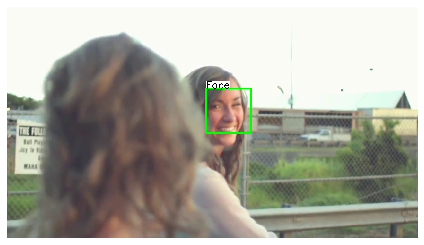

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the function that finds all faces in the image through the detector.
def detect_faces(video_file, detector, win_title):
    cap = cv2.VideoCapture(video_file)
    
    while True:
        status_cap, frame = cap.read()
        if not status_cap:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = detector.detectMultiScale(gray, 1.3, 5)

        for x, y, w, h in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)
            text_size, _ = cv2.getTextSize('Face', cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
            cv2.rectangle(frame, (x, y - text_size[1]), (x + text_size[0], y), (255, 255, 255), cv2.FILLED)
            cv2.putText(frame, 'Face', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        cv2.imshow(win_title, frame)
        
        if cv2.waitKey(1) == 27: #ESC
            break

    cap.release()
    cv2.destroyAllWindows()
    
    if status_cap:
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.axis('off')
        plt.xticks([]), plt.yticks([])
        plt.tight_layout()
        plt.imshow(image)
        plt.show()

# Call up the pre-trained Haar cascade from OpenCV and
# call the detection function defined above.
haar_face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
detect_faces('./data/faces.mp4', haar_face_cascade, 'Haar cascade face detector')

# Call up the pre-trained LBP cascade from OpenCV.
# All basic detectors are available in the OpenCV repository.
##https://github.com/opencv/opencv/tree/master/data
lbp_face_cascade = cv2.CascadeClassifier()
lbp_face_cascade.load('./data/lbpcascade_frontalface.xml')
detect_faces(0, lbp_face_cascade, 'LBP cascade face detector') #device

## 12. Detecting Aruco patterns for AR applications

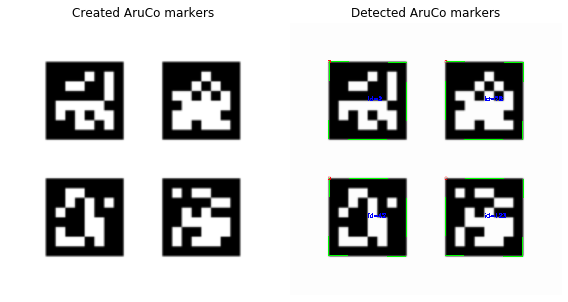

In [12]:
import cv2
import cv2.aruco as aruco
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Blur the image with different AruCo markers.
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

img = np.full((700, 700), 255, np.uint8)

img[100:300, 100:300] = aruco.drawMarker(aruco_dict, 2, 200)
img[100:300, 400:600] = aruco.drawMarker(aruco_dict, 76, 200)
img[400:600, 100:300] = aruco.drawMarker(aruco_dict, 42, 200)
img[400:600, 400:600] = aruco.drawMarker(aruco_dict, 123, 200)

img = cv2.GaussianBlur(img, (11, 11), 0)

cv2.imshow('Created AruCo markers', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Detect markers of image with blurring.
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)

corners, ids, _ = aruco.detectMarkers(img, aruco_dict)

img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
aruco.drawDetectedMarkers(img_color, corners, ids)

cv2.imshow('Detected AruCo markers', img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(8,8))
plt.subplot(121)
#image1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.title('Created AruCo markers')
plt.imshow(img, cmap='gray')
plt.subplot(122)
image2 = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.xticks([]), plt.yticks([])
plt.axis('off')
plt.title('Detected AruCo markers')
plt.imshow(image2)
plt.tight_layout()
plt.show()

## 13. Recognize text in natural scenes

In [13]:
'''
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/scenetext01.jpg')

# Call up pre-trained CNN and detect text.
det = cv2.text.TextDetectorCNN_create("./data/textbox.prototxt", "./data/TextBoxes_icdar13.caffemodel")
rects, probs = det.detect(img) # There is an error here.

# Draw bounding boxes on text detected with probabilities above threshold.
THR = 0.3
for i, r in enumerate(rects):
    if probs[i] > THR:
        cv2.rectangle(img, (r[0], r[1]), (r[0]+r[2], r[1]+r[3]), (0, 255, 0), 2)
        
# Visualize
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(img[:,:,[2,1,0]])
plt.tight_layout()
plt.show()
'''
print()

## 14. QR codes detector and recognizer

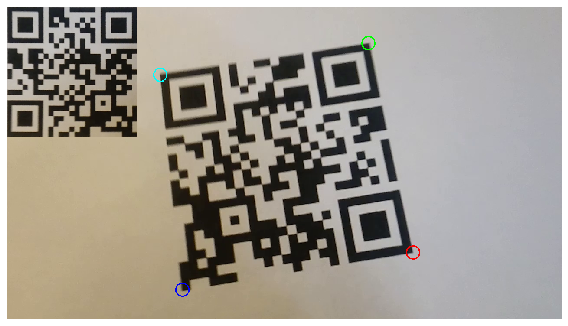

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Step1: Make a function to find the intersection of two straight lines.
def intersect(l1, l2):
    delta = np.array([l1[1] - l1[0], l2[1] - l2[0]]).astype(np.float32)
    
    delta = 1 / delta
    delta[:, 0] *= -1
    
    b = np.matmul(delta, np.array([l1[0], l2[0]]).transpose())
    b = np.diagonal(b).astype(np.float32)
        
    res = cv2.solve(delta, b)
    return res[0], tuple(res[1].astype(np.int32).reshape((2)))

# Step2: Define a function to deal with distal distortion by calculating similarity
#        between the four pairs of skewed and non-distorted points.
def rectify(image, corners, out_size):
    rect = np.zeros((4, 2), dtype = "float32")
    rect[0] = corners[0]
    rect[1] = corners[1]
    rect[2] = corners[2]
    rect[3] = corners[3]

    dst = np.array([
        [0, 0],
        [out_size[1] - 1, 0],
        [out_size[1] - 1, out_size[0] - 1],
        [0, out_size[0] - 1]], dtype = "float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    rectified = cv2.warpPerspective(image, M, out_size)
    return rectified

# Step3: Generate a function that finds the outside edge of QR code.
def qr_code_outer_corners(image):
    outer_corners_found = False
    outer_corners = []
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    _, contours, hierarchy = \
            cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cnts = []
    centers = []
        
    hierarchy = hierarchy.reshape((-1, 4))
    for i in range(hierarchy.shape[0]):
        i_next, i_prev, i_child, i_par = hierarchy[i]
        if all(v == -1 for v in hierarchy[i][:3]):
            if all(v == -1 for v in hierarchy[i_par][:2]):
                ids = [i, i_par, hierarchy[i_par][3]]
                corner_cnts = []
                for id_ in ids:
                    cnt = contours[id_]
                    apprx = \
                        cv2.approxPolyDP(cnt, cv2.arcLength(cnt, True) * 0.02, True)
                    if len(apprx) == 4:
                        corner_cnts.append(apprx.reshape((4, -1)))
                if len(corner_cnts) == 3:
                    cnts.append(corner_cnts)
                    all_pts = np.array(corner_cnts).reshape(-1, 2)
                    
                    centers.append(np.mean(all_pts, 0))
    
    if len(centers) == 3:        
        distances_between_pts = np.linalg.norm(np.roll(centers, 1, 0) - centers, axis=1)
        max_dist_id = np.argmax(distances_between_pts)
        
        index_diag_pt_1 = max_dist_id
        index_diag_pt_2 = (max_dist_id - 1) % len(centers)
        index_corner_pt = (len(centers) - 1)*len(centers) // 2 - index_diag_pt_1 - index_diag_pt_2
        
        middle_pt = 0.5 * (centers[index_diag_pt_1] + centers[index_diag_pt_2])
        
        i_ul_pt = np.argmax(np.linalg.norm(cnts[index_corner_pt][-1] - middle_pt, axis=1))
        ul_pt = cnts[index_corner_pt][-1][i_ul_pt]
                
        for i in [index_diag_pt_1, index_diag_pt_2]:
            corner_cnts = cnts[i]
            outer_cnt = corner_cnts[-1]
            
            distances_to_mp = np.linalg.norm(outer_cnt - middle_pt, axis=1)
            max_dist_id = np.argmax(distances_to_mp)      
        
            vec_from_mid_to_diag = outer_cnt[max_dist_id] - middle_pt
            vec_from_mid_to_corner = ul_pt - middle_pt
            cross_prod = np.cross(vec_from_mid_to_corner, vec_from_mid_to_diag)
        
            diff_idx = 0
        
            if cross_prod > 0:
                ur_pt = outer_cnt[max_dist_id]
                ur_pt_2 = outer_cnt[(max_dist_id + 1) % len(outer_cnt)]
            else:
                bl_pt = outer_cnt[max_dist_id]
                bl_pt_2 = outer_cnt[(max_dist_id - 1) % len(outer_cnt)]
                    
        ret, br_pt = intersect((bl_pt, bl_pt_2), (ur_pt, ur_pt_2))
        
        if ret == True:
            outer_corners_found = True
            outer_corners = [ul_pt, ur_pt, br_pt, bl_pt]
    
    return outer_corners_found, outer_corners


# Step4: Open video containing QR code and get the QR code in each frame.
#        If found, mark the edges of each QR code in the form of a standard view.
cap = cv2.VideoCapture('./data/qr.mp4')

while True:
    ret, frame = cap.read()
    if ret == False:
        break
    
    result, corners = qr_code_outer_corners(frame)
    
    qr_code_size = 300
    
    if result:
        if all((0, 0) < tuple(c) < (frame.shape[1], frame.shape[0]) for c in corners):
            rectified = rectify(frame, corners, (qr_code_size, qr_code_size))
            
            cv2.circle(frame, tuple(corners[0]), 15, (0, 255, 0), 2)
            cv2.circle(frame, tuple(corners[1]), 15, (0, 0, 255), 2)
            cv2.circle(frame, tuple(corners[2]), 15, (255, 0, 0), 2)
            cv2.circle(frame, tuple(corners[3]), 15, (255, 255, 0), 2)
            
            frame[0:qr_code_size, 0:qr_code_size] = rectified

    cv2.imshow('QR code detection', frame)
    
    k = cv2.waitKey(50) #Speed
    
    if k == 27: #ESC
        break

cap.release()
cv2.destroyAllWindows()

image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()